<a href="https://colab.research.google.com/github/belokonr/ECON5200-Applied-Data-Analytics-in-Economics/blob/main/lab_2_econ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install fredapi

In [4]:
import pandas as pd
from fredapi import Fred

In [5]:
fred = Fred(api_key="3e150c3fcd656c5656ed9c32d89a86b9")

In [6]:
# 1. Fetch the data series
print("Fetching data from FRED...")
#nom wage from fred website:
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

# 2. Combine into a DataFrame
df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

# 3. Drop missing values (The wage data starts later than CPI data)
df = df.dropna()

# Inspect the raw data
print(df.head())
print(df.tail())

Fetching data from FRED...
            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031
2025-12-01         31.76  326.030


In [8]:
def get_real_wage(nominal_col, cpi_col):
  '''
  take nominal anc cpi columns, returns new col adjusted for inflation (real dollars)
  '''
  #get cpi
  cpi_today = cpi_col.iloc[-1]

  real_col = (nominal_col/cpi_col) * cpi_today
  return real_col


# Apply the function to create a new column
# We feed the "Machine" our two columns:
df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])

# Check the result - Notice how Real Wages are different from Nominal!
print(df.tail())







            Nominal_Wage      CPI  Real_Wage
2025-07-01         31.35  322.132  31.729355
2025-08-01         31.45  323.364  31.709292
2025-09-01         31.52  324.368  31.681502
2025-11-01         31.73  325.031  31.827524
2025-12-01         31.76  326.030  31.760000


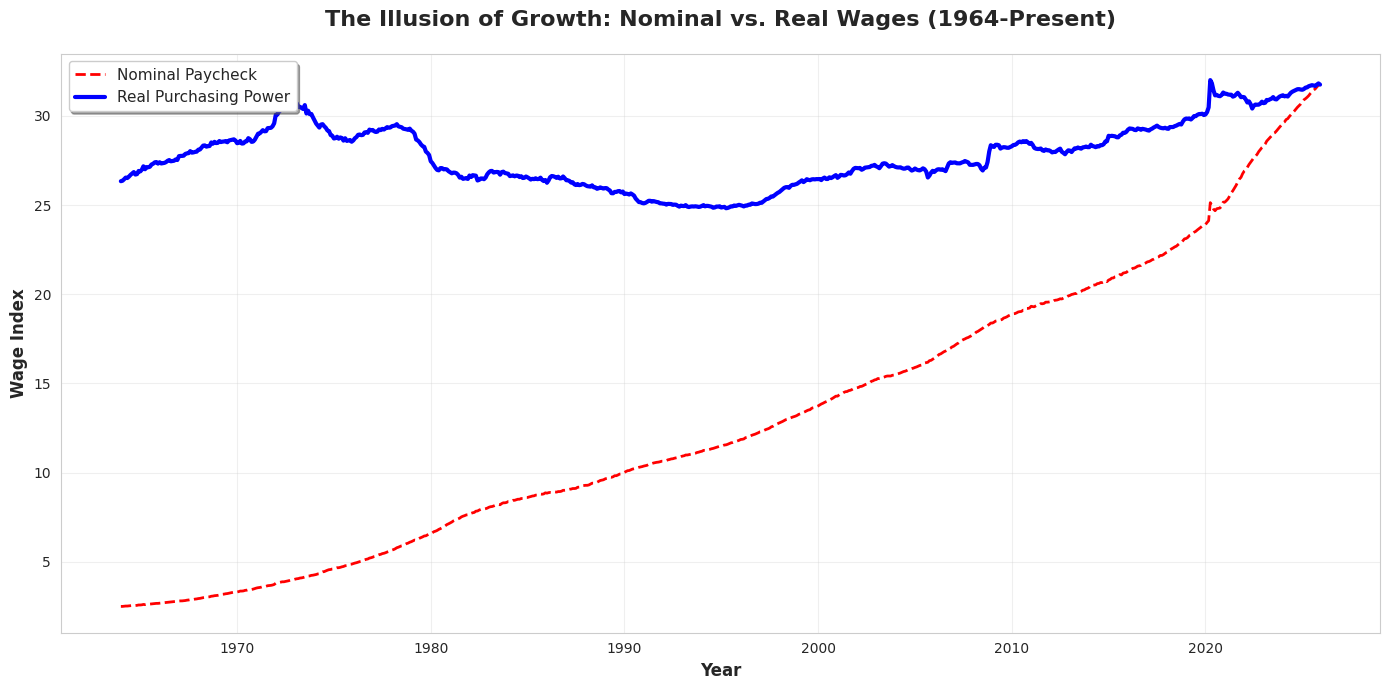

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot both wage series
ax.plot(df.index, df['Nominal_Wage'],
        color='red',
        linestyle='--',
        linewidth=2,
        label='Nominal Paycheck')

ax.plot(df.index, df['Real_Wage'],
        color='blue',
        linewidth=3,
        label='Real Purchasing Power')

# Add title and labels
ax.set_title('The Illusion of Growth: Nominal vs. Real Wages (1964-Present)',
             fontsize=16,
             fontweight='bold',
             pad=20)
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Wage Index', fontsize=12, fontweight='bold')

# Add annotation for 2020 pandemic spike
# Find approximate position of 2020 spike
pandemic_year = '2020'
if pandemic_year in df.index.astype(str):
    pandemic_idx = df.index.get_loc(pandemic_year)
    pandemic_value = df['Real_Wage'].iloc[pandemic_idx]

    ax.annotate('Pandemic Composition Effect',
                xy=(df.index[pandemic_idx], pandemic_value),
                xytext=(df.index[pandemic_idx - 50], pandemic_value + 5),
                fontsize=11,
                fontweight='bold',
                arrowprops=dict(arrowstyle='->',
                               color='black',
                               lw=2,
                               connectionstyle='arc3,rad=0.3'))

# Add legend
ax.legend(loc='upper left', fontsize=11, frameon=True, shadow=True)

# Improve grid appearance
ax.grid(True, alpha=0.3)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

data structure bias: in 2020, real wage seems to go up, but it is bc low wage workers such as retail lost their jobs and could not report on their wages.
 must watch out for this kind of thing

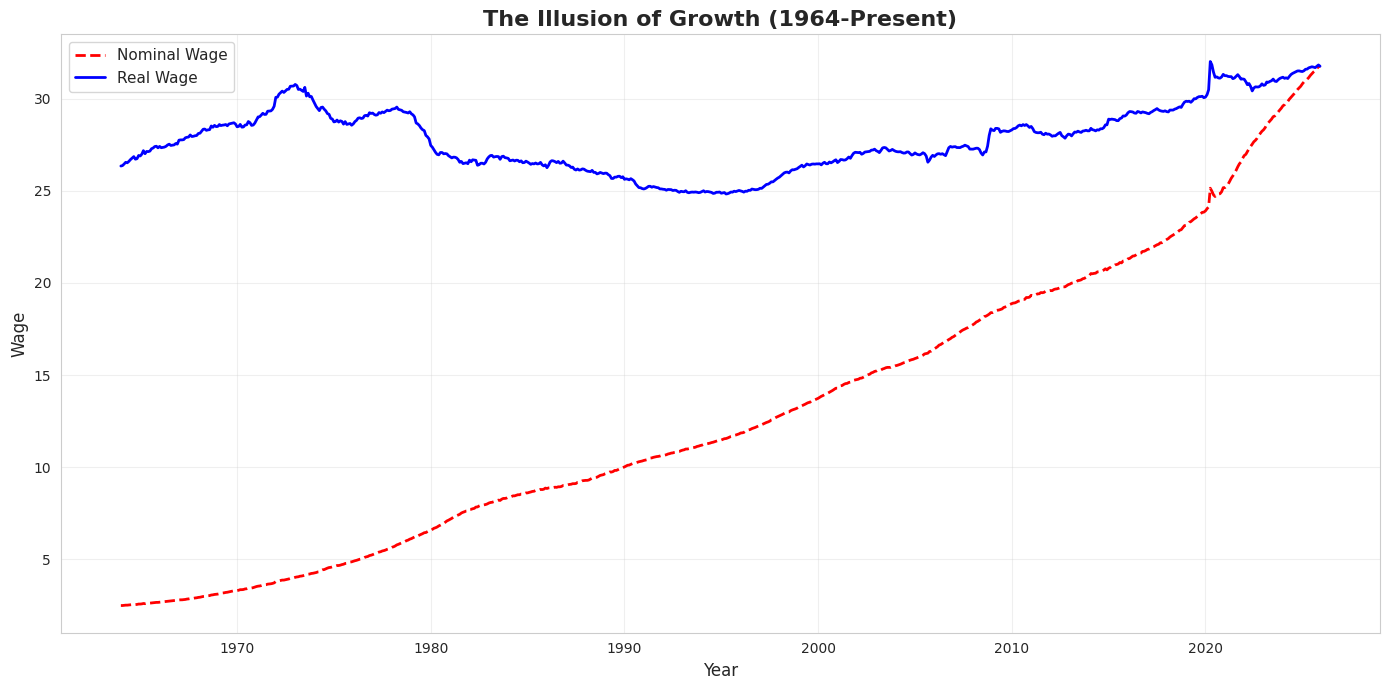

In [11]:
import matplotlib.pyplot as plt

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot both wage series
ax.plot(df.index, df['Nominal_Wage'],
        color='red',
        linestyle='--',
        linewidth=2,
        label='Nominal Wage')

ax.plot(df.index, df['Real_Wage'],
        color='blue',
        linewidth=2,
        label='Real Wage')

# Add title and labels
ax.set_title('The Illusion of Growth (1964-Present)',
             fontsize=16,
             fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Wage', fontsize=12)

# Add annotation for 2020 pandemic spike
# Attempt to find 2020 in the index
try:
    # Try different possible datetime formats
    if '2020' in df.index.astype(str):
        pandemic_idx = df.index.astype(str).str.contains('2020').argmax()
        pandemic_value = df['Real_Wage'].iloc[pandemic_idx]

        ax.annotate('Pandemic Composition Effect',
                    xy=(df.index[pandemic_idx], pandemic_value),
                    xytext=(df.index[pandemic_idx - 50], pandemic_value + 5),
                    fontsize=11,
                    arrowprops=dict(arrowstyle='->',
                                   color='black',
                                   lw=2))
except:
    # If 2020 not found, skip annotation
    pass

# Add legend
ax.legend(loc='best', fontsize=11)

# Add grid
ax.grid(True, alpha=0.3)

# Tight layout
plt.tight_layout()

# Display the plot
plt.show()

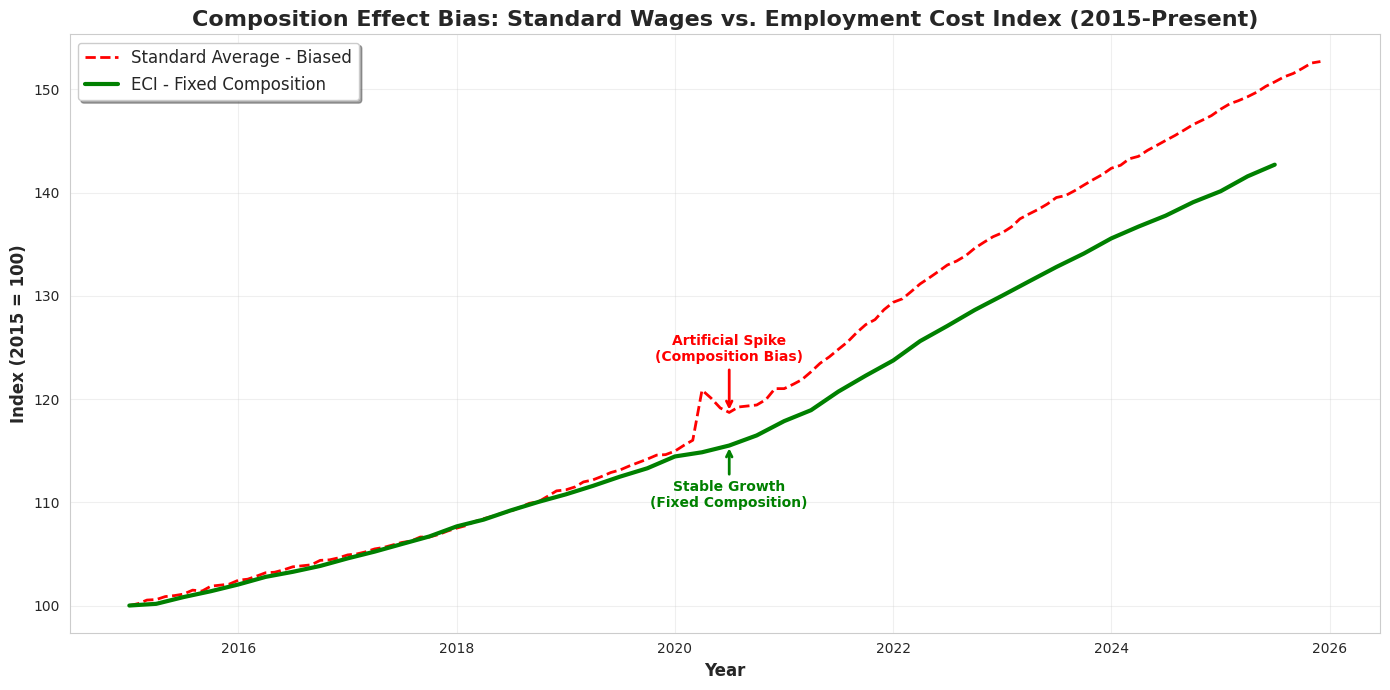

In [12]:
import matplotlib.pyplot as plt

# Fetch Employment Cost Index data
eci = fred.get_series('ECIWAG')

# Filter both series to 2015 onwards
start_date = '2015-01-01'
wages_filtered = wages[wages.index >= start_date]
eci_filtered = eci[eci.index >= start_date]

# Rebase both series to 100 (first value = 100)
wages_rebased = (wages_filtered / wages_filtered.iloc[0]) * 100
eci_rebased = (eci_filtered / eci_filtered.iloc[0]) * 100

# Create the plot
fig, ax = plt.subplots(figsize=(14, 7))

# Plot both series
ax.plot(wages_rebased.index, wages_rebased,
        color='red',
        linestyle='--',
        linewidth=2,
        label='Standard Average - Biased')

ax.plot(eci_rebased.index, eci_rebased,
        color='green',
        linewidth=3,
        label='ECI - Fixed Composition')

# Add title and labels
ax.set_title('Composition Effect Bias: Standard Wages vs. Employment Cost Index (2015-Present)',
             fontsize=16,
             fontweight='bold')
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Index (2015 = 100)', fontsize=12, fontweight='bold')

# Annotate the 2020 divergence
# Find 2020 data points
try:
    # Locate 2020 in both series
    mask_2020 = wages_rebased.index.year == 2020
    if mask_2020.any():
        # Get April 2020 (or first 2020 date available)
        idx_2020 = wages_rebased.index[mask_2020][len(wages_rebased.index[mask_2020])//2]

        wages_2020_value = wages_rebased.loc[idx_2020]
        eci_2020_value = eci_rebased.loc[idx_2020]

        # Annotate the artificial spike
        ax.annotate('Artificial Spike\n(Composition Bias)',
                    xy=(idx_2020, wages_2020_value),
                    xytext=(idx_2020, wages_2020_value + 5),
                    fontsize=10,
                    fontweight='bold',
                    color='red',
                    ha='center',
                    arrowprops=dict(arrowstyle='->',
                                   color='red',
                                   lw=2))

        # Annotate the stable growth
        ax.annotate('Stable Growth\n(Fixed Composition)',
                    xy=(idx_2020, eci_2020_value),
                    xytext=(idx_2020, eci_2020_value - 6),
                    fontsize=10,
                    fontweight='bold',
                    color='green',
                    ha='center',
                    arrowprops=dict(arrowstyle='->',
                                   color='green',
                                   lw=2))
except:
    pass

# Add legend
ax.legend(loc='upper left', fontsize=12, frameon=True, shadow=True)

# Add grid
ax.grid(True, alpha=0.3)

# Tight layout
plt.tight_layout()

# Display the plot
plt.show()